<a href="https://colab.research.google.com/github/rahulranjansah/data_mining/blob/main/datamania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import pathlib
import sys

In [3]:
core_path = "raw_data/"

In [4]:
# Create the level0 data directory
pathlib.Path(os.path.join(core_path)).mkdir(parents=True, exist_ok=True)

In [5]:
ufo_df = pd.read_csv(os.path.join(core_path + "ufo_sightings.csv"), skiprows=1,
                    on_bad_lines="skip", low_memory=False,
                    names=["datetime", "city",
                    "state", "country", "shape", "visible_seconds",
                    "visible_hrs_min", "comments",
                    "date_posted", "latitude", "longitude"]
                    )

In [5]:
ufo_df.dtypes

datetime            object
city                object
state               object
country             object
shape               object
visible_seconds     object
visible_hrs_min     object
comments            object
date_posted         object
latitude            object
longitude          float64
dtype: object

In [6]:
ufo_df

datetime                  city state country     shape  \
0      10/10/1949 20:30            san marcos    tx      us  cylinder   
1      10/10/1949 21:00          lackland afb    tx     NaN     light   
2      10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3      10/10/1956 21:00                  edna    tx      us    circle   
4      10/10/1960 20:00               kaneohe    hi      us     light   
...                 ...                   ...   ...     ...       ...   
88674    9/9/2013 22:00                  napa    ca      us     other   
88675    9/9/2013 22:20                vienna    va      us    circle   
88676    9/9/2013 23:00                edmond    ok      us     cigar   
88677    9/9/2013 23:00                 starr    sc      us   diamond   
88678    9/9/2013 23:30        ft. lauderdale    fl      us      oval   

      visible_seconds visible_hrs_min  \
0                2700      45 minutes   
1                7200         1-2 hrs   
2                  20      20 seconds   
3                  20        1/2 hour   
4                 900      15 minutes   
...               ...             ...   
88674            1200            hour   
88675               5       5 seconds   
88676            1020      17 minutes   
88677               0        2 nights   
88678               0  still occuring   

                                                comments date_posted  \
0      This event took place in early fall around 194...   4/27/2004   
1      1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   
2      Green/Orange circular disc over Chester&#44 En...   1/21/2008   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
...                                                  ...         ...   
88674                                       Napa UFO&#44   9/30/2013   
88675  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
88676  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   
88677  On September ninth my wife and i noticed stran...   9/30/2013   
88678  Hovering object lit with red and white lights&...   9/30/2013   

         latitude   longitude  
0      29.8830556  -97.941111  
1        29.38421  -98.581082  
2            53.2   -2.916667  
3      28.9783333  -96.645833  
4      21.4180556 -157.803611  
...           ...         ...  
88674  38.2972222 -122.284444  
88675  38.9011111  -77.265556  
88676  35.6527778  -97.477778  
88677  34.3769444  -82.695833  
88678  26.1219444  -80.143611  

[88679 rows x 11 columns]

In [7]:
sys.path.append("auxiliary/")
from datetime_parser import custom_to_datetime

In [8]:
ufo_df["datetime"] = ufo_df["datetime"].apply(custom_to_datetime)

ufo_df["month"] = pd.DatetimeIndex(ufo_df["datetime"]).month
ufo_df["year"] = pd.DatetimeIndex(ufo_df["datetime"]).year
ufo_df["day"] = pd.DatetimeIndex(ufo_df["datetime"]).day
ufo_df["hour"] = pd.DatetimeIndex(ufo_df["datetime"]).hour

In [9]:
ufo_df.dtypes

datetime           datetime64[ns]
city                       object
state                      object
country                    object
shape                      object
visible_seconds            object
visible_hrs_min            object
comments                   object
date_posted                object
latitude                   object
longitude                 float64
month                       int32
year                        int32
day                         int32
hour                        int32
dtype: object

In [10]:
# numeric_val and cleaning position
ufo_df["date_posted"] = pd.to_datetime(ufo_df["date_posted"])
ufo_df["latitude"] = pd.to_numeric(ufo_df["latitude"], errors="coerce")
ufo_df["lognitude"] = pd.to_numeric(ufo_df["longitude"], errors="coerce")
ufo_df["visible_seconds"] = pd.to_numeric(ufo_df["visible_seconds"], errors="coerce")
ufo_df["latitude"] = ufo_df["latitude"].replace({0.0: np.nan})
ufo_df.loc[:, "longitude"].replace({0.0: np.nan}, inplace=True)
ufo_df.loc[:,"visible_seconds"].replace({0.0: np.nan}, inplace=True)
ufo_df.index = np.arange(0, len(ufo_df))

/tmp/ipykernel_167955/3319300174.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ufo_df.loc[:, "longitude"].replace({0.0: np.nan}, inplace=True)
/tmp/ipykernel_167955/3319300174.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [11]:
ufo_df.dtypes

datetime           datetime64[ns]
city                       object
state                      object
country                    object
shape                      object
visible_seconds           float64
visible_hrs_min            object
comments                   object
date_posted        datetime64[ns]
latitude                  float64
longitude                 float64
month                       int32
year                        int32
day                         int32
hour                        int32
lognitude                 float64
dtype: object

In [12]:
filtered_ufo_df = ufo_df.loc[(ufo_df["visible_seconds"] > 5.0) & (ufo_df["visible_seconds"] < 3600.0)]

In [13]:
filtered_ufo_df = filtered_ufo_df[~filtered_ufo_df["shape"].isin(["unknown", "light", "flare", "nan"])]

In [14]:
filtered_ufo_df["shape"].value_counts()

shape
triangle     6983
circle       6447
fireball     4847
other        4711
sphere       4623
disk         4582
oval         3141
formation    2221
cigar        1801
changing     1642
rectangle    1151
cylinder     1125
diamond      1019
chevron       821
flash         782
egg           630
teardrop      601
cone          266
cross         207
delta           6
pyramid         1
crescent        1
round           1
hexagon         1
Name: count, dtype: int64

In [15]:
filtered_ufo_df

datetime                  city state country     shape  \
0     1949-10-10 20:30:00            san marcos    tx      us  cylinder   
2     1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3     1956-10-10 21:00:00                  edna    tx      us    circle   
5     1961-10-10 19:00:00               bristol    tn      us    sphere   
6     1965-10-10 21:00:00    penarth (uk/wales)   NaN      gb    circle   
...                   ...                   ...   ...     ...       ...   
88669 2013-09-09 21:00:00       milton (canada)    on      ca  fireball   
88670 2013-09-09 21:00:00             woodstock    ga      us    sphere   
88672 2013-09-09 22:00:00                 boise    id      us    circle   
88674 2013-09-09 22:00:00                  napa    ca      us     other   
88676 2013-09-09 23:00:00                edmond    ok      us     cigar   

       visible_seconds visible_hrs_min  \
0               2700.0      45 minutes   
2                 20.0      20 seconds   
3                 20.0        1/2 hour   
5                300.0       5 minutes   
6                180.0    about 3 mins   
...                ...             ...   
88669            180.0       3 minutes   
88670             20.0      20 seconds   
88672           1200.0      20 minutes   
88674           1200.0            hour   
88676           1020.0      17 minutes   

                                                comments date_posted  \
0      This event took place in early fall around 194...  2004-04-27   
2      Green/Orange circular disc over Chester&#44 En...  2008-01-21   
3      My older brother and twin sister were leaving ...  2004-01-17   
5      My father is now 89 my brother 52 the girl wit...  2007-04-27   
6      penarth uk  circle  3mins  stayed 30ft above m...  2006-02-14   
...                                                  ...         ...   
88669              Massive Bright Orange Fireball in Sky  2013-09-30   
88670  Driving 575 at 21:00 hrs saw a white and green...  2013-09-30   
88672  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...  2013-09-30   
88674                                       Napa UFO&#44  2013-09-30   
88676  2 witnesses 2  miles apart&#44 Red &amp; White...  2013-09-30   

        latitude   longitude  month  year  day  hour   lognitude  
0      29.883056  -97.941111     10  1949   10    20  -97.941111  
2      53.200000   -2.916667     10  1955   10    17   -2.916667  
3      28.978333  -96.645833     10  1956   10    21  -96.645833  
5      36.595000  -82.188889     10  1961   10    19  -82.188889  
6      51.434722   -3.180000     10  1965   10    21   -3.180000  
...          ...         ...    ...   ...  ...   ...         ...  
88669  46.300000  -63.216667      9  2013    9    21  -63.216667  
88670  34.101389  -84.519444      9  2013    9    21  -84.519444  
88672  43.613611 -116.202500      9  2013    9    22 -116.202500  
88674  38.297222 -122.284444      9  2013    9    22 -122.284444  
88676  35.652778  -97.477778      9  2013    9    23  -97.477778  

[49080 rows x 16 columns]

In [18]:
# import pandas as pd
# import numpy as np

# def prep_ufo_data(df):

#     def custom_to_datetime(date):
#         if date[11:13] == "24":
#             x = date[:11] + "23:59"
#         elif date[10:12] == "24":
#             x = date[:10] + "23:59"
#         elif date[9:11] == "24":
#             x = date[:9] + "23:59"
#         else:
#             return pd.to_datetime(date)

#         return pd.to_datetime(x)

#     # numeric_val and cleaning position
#     df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
#     df["lognitude"] = pd.to_numeric(df["longitude"], errors="coerce")
#     df["duration (seconds)"] = pd.to_numeric(df["duration (seconds)"], errors="coerce")

#     df.loc[:,"latitude"].replace({0.0: np.nan}, inplace=True)
#     df.loc[:, "longitude"].replace({0.0: np.nan}, inplace=True)
#     df.loc[:,"duration (seconds)"].replace({0.0: np.nan}, inplace=True)
#     df.index = np.arange(0, len(df))

#     # initialzing datetime series with time of report
#     df["datetime"] = df["datetime"].apply(custom_to_datetime)
#     df["date posted"] = pd.to_datetime(df["date posted"])

#     df["month"] = pd.DatetimeIndex(df["datetime"]).month
#     df["year"] = pd.DatetimeIndex(df["datetime"]).year
#     df["day"] = pd.DatetimeIndex(df["datetime"]).day
#     df["hour"] = pd.DatetimeIndex(df["datetime"]).hour

#     return df



In [16]:
filtered_ufo_df.describe()

datetime  visible_seconds  \
count                          49080     49080.000000   
mean   2003-09-30 06:29:08.979217664       421.027136   
min              1910-01-02 00:00:00         5.500000   
25%              2000-12-04 19:00:00        60.000000   
50%              2006-09-02 15:30:00       180.000000   
75%              2011-07-04 21:31:15       600.000000   
max              2014-05-08 00:00:00      3540.000000   
std                              NaN       561.367741   

                         date_posted      latitude     longitude  \
count                          49080  48253.000000  48254.000000   
mean   2007-08-01 20:25:50.904645632     38.092707    -86.026688   
min              1998-03-07 00:00:00    -45.097512   -173.985008   
25%              2003-10-31 00:00:00     34.138889   -111.970486   
50%              2007-11-28 00:00:00     39.427825    -87.650000   
75%              2011-12-12 00:00:00     42.658333    -78.333333   
max              2014-05-08 00:00:00     72.700000    178.017649   
std                              NaN     10.408620     39.941111   

              month          year           day          hour     lognitude  
count  49080.000000  49080.000000  49080.000000  49080.000000  49080.000000  
mean       6.809902   2003.223085     14.885065     15.564425    -84.578887  
min        1.000000   1910.000000      1.000000      0.000000   -173.985008  
25%        4.000000   2000.000000      7.000000     11.000000   -111.890278  
50%        7.000000   2006.000000     15.000000     19.000000    -87.068403  
75%        9.000000   2011.000000     22.000000     21.000000    -77.460556  
max       12.000000   2014.000000     31.000000     23.000000    178.017649  
std        3.212168     11.257569      8.930516      7.525053     41.120548

In [17]:
filtered_ufo_df.dtypes

datetime           datetime64[ns]
city                       object
state                      object
country                    object
shape                      object
visible_seconds           float64
visible_hrs_min            object
comments                   object
date_posted        datetime64[ns]
latitude                  float64
longitude                 float64
month                       int32
year                        int32
day                         int32
hour                        int32
lognitude                 float64
dtype: object

##Locations
- lat and long parsing
- scatter plot




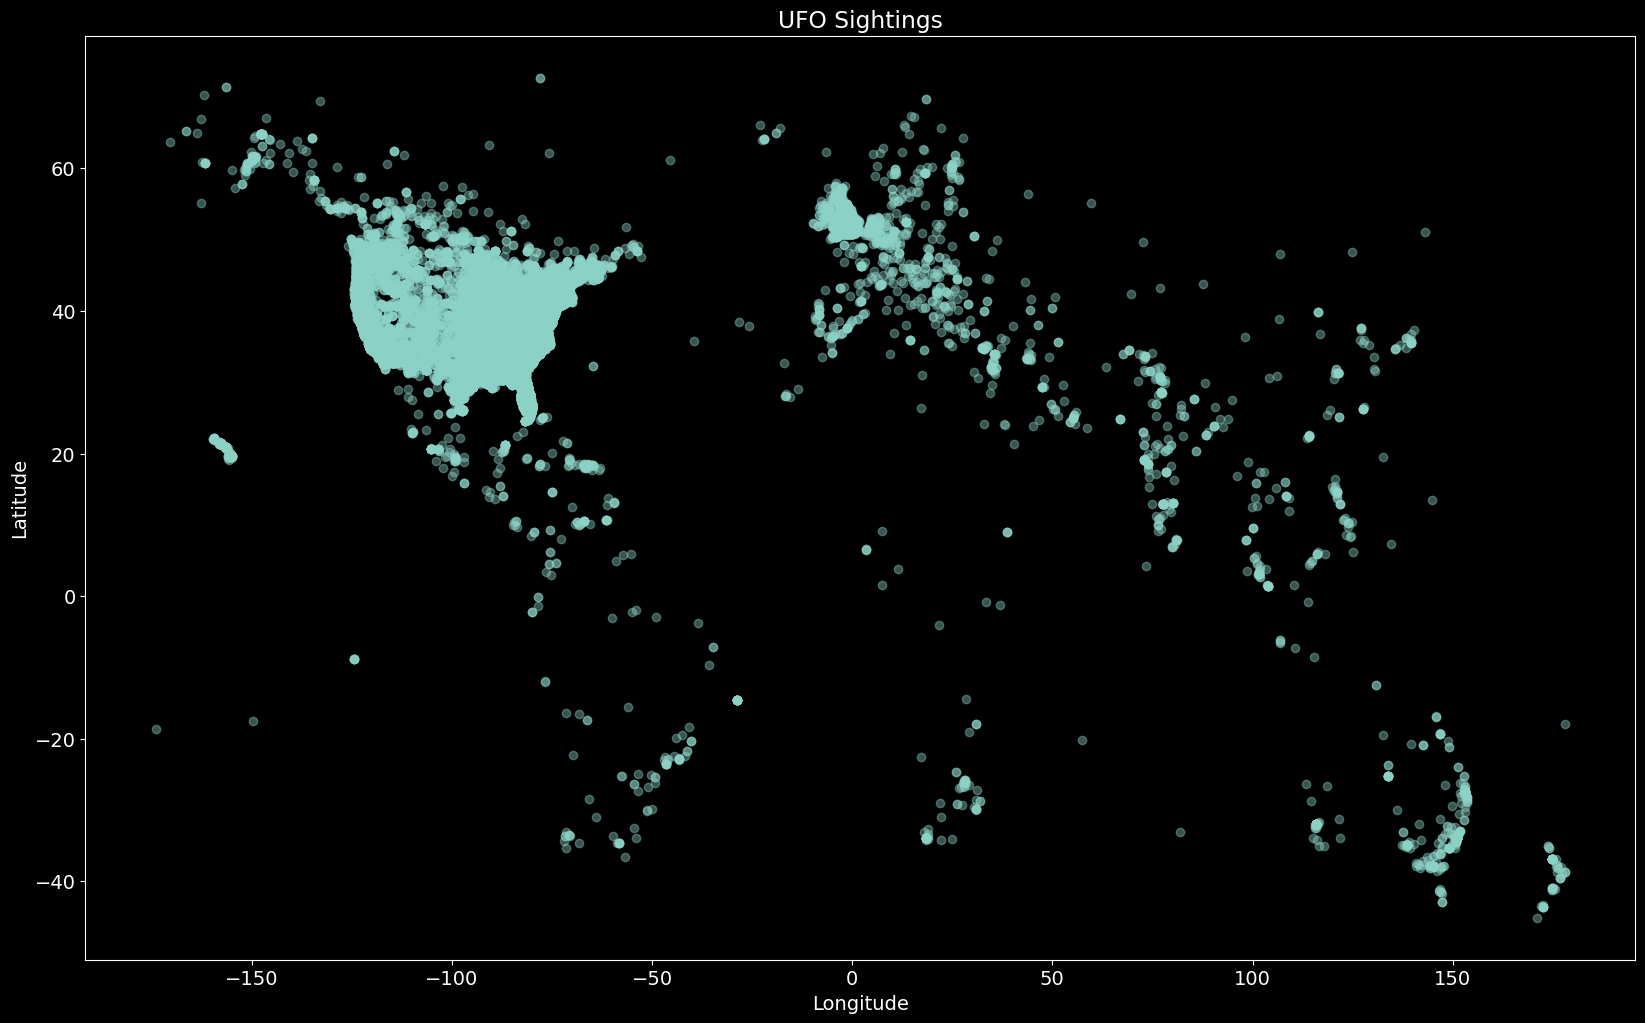

In [18]:
# format
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 14})

fig, ax = plt.subplots()
fig.set_size_inches(20,12)

x = filtered_ufo_df["lognitude"]
y = filtered_ufo_df["latitude"]

ax.scatter(x,y, alpha=0.4)

ax.set_title("UFO Sightings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [19]:
top_cities = (filtered_ufo_df[["city", "datetime"]]
.groupby("city")
.count()
.rename(columns={"datetime":"cnt"})
.sort_values("cnt", ascending=False)
).head()

In [20]:
top_cities

cnt
city            
seattle      295
phoenix      288
los angeles  228
las vegas    224
portland     220

In [21]:
# # Group the data by city and calculate the count and mean
city_group = filtered_ufo_df.groupby('city').agg(
    Count=pd.NamedAgg(column='city', aggfunc='count'),
    Latitude=pd.NamedAgg(column='latitude', aggfunc='mean'),
    Longitude=pd.NamedAgg(column='longitude', aggfunc='mean')
).reset_index()

In [22]:
city_group

city  Count   Latitude  Longitude
0                 &ccedil;anakkale (turkey)      1  40.155312  26.414160
1      &iacute;safj&ouml;r&eth;ur (iceland)      1  66.075833 -23.126667
2                           ((unspecified))      1        NaN        NaN
3             (above mountains in airplane)      1        NaN        NaN
4                      (city not specified)      1        NaN        NaN
...                                     ...    ...        ...        ...
14681               zuiddorpe (netherlands)      1  51.234551   3.903091
14682                              zumbrota      2  44.294167 -92.668889
14683                  zurich (switzerland)      1        NaN        NaN
14684                 zutphen (netherlands)      1  52.142736   6.196058
14685                                zwolle      1  31.631389 -93.643889

[14686 rows x 4 columns]

In [27]:
import geopandas as gpd
import plotly.express as px
import plotly.io as py

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create the plot
fig = px.scatter_geo(city_group, lat='Latitude', lon='Longitude',
                     projection='natural earth',
                     color='Count',
                     size='Count',
                     hover_name='city',
                     hover_data=['Count'],
                     color_continuous_scale='Viridis')

# Add the world map
fig.update_geos(showcountries=True, countrywidth=0.2)

# Layout
fig.update_layout(
    title_text='UFO Sightings',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)
py.write_html(fig, "ufo_sightings.html")

fig.show()

/tmp/ipykernel_167955/4030804429.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [28]:
## Cities grouping to see how data looks like
- charts?

Object `charts` not found.


In [29]:
top_cities = (filtered_ufo_df[["city", "datetime"]]
.groupby("city")
.count()
.rename(columns={"datetime":"cnt"})
.sort_values("cnt", ascending=False)
).head(10)
print(top_cities)

             cnt
city            
seattle      295
phoenix      288
los angeles  228
las vegas    224
portland     220
san diego    206
houston      191
chicago      176
miami        146
orlando      142


<Axes: title={'center': 'Top Cities'}, xlabel='city'>

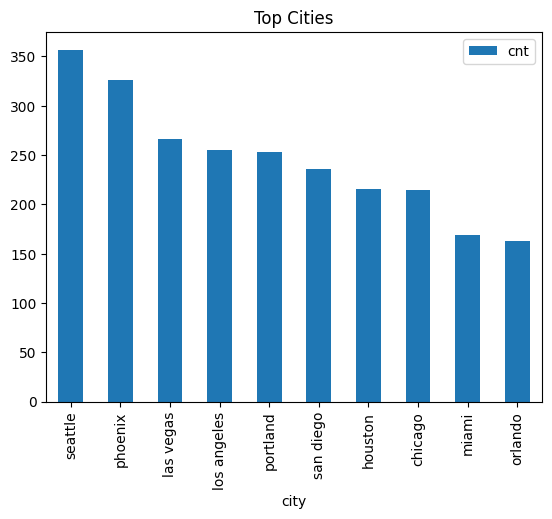

In [ ]:
top_cities.plot.bar(title="Top Cities") # quickplots using pandas, a thing to be considered in both of the data which ranks high is based on army bases presence.

## Time of sightings
- When: years: time series line chart
- Weekdays: barchart
- Hours: barchart



In [30]:
import seaborn as sns

# Syntax
# sns.lineplot(x, y, data)


In [32]:
year_group = (filtered_ufo_df[["year", "datetime"]]
.groupby("year")
.count()
.rename(columns={"datetime":"cnt"})
).loc[:2013]


In [33]:
year_group

cnt
year      
1910     2
1916     1
1925     1
1929     1
1930     1
...    ...
2009  2591
2010  2524
2011  3037
2012  4633
2013  4412

[82 rows x 1 columns]

<Axes: xlabel='year', ylabel='cnt'>

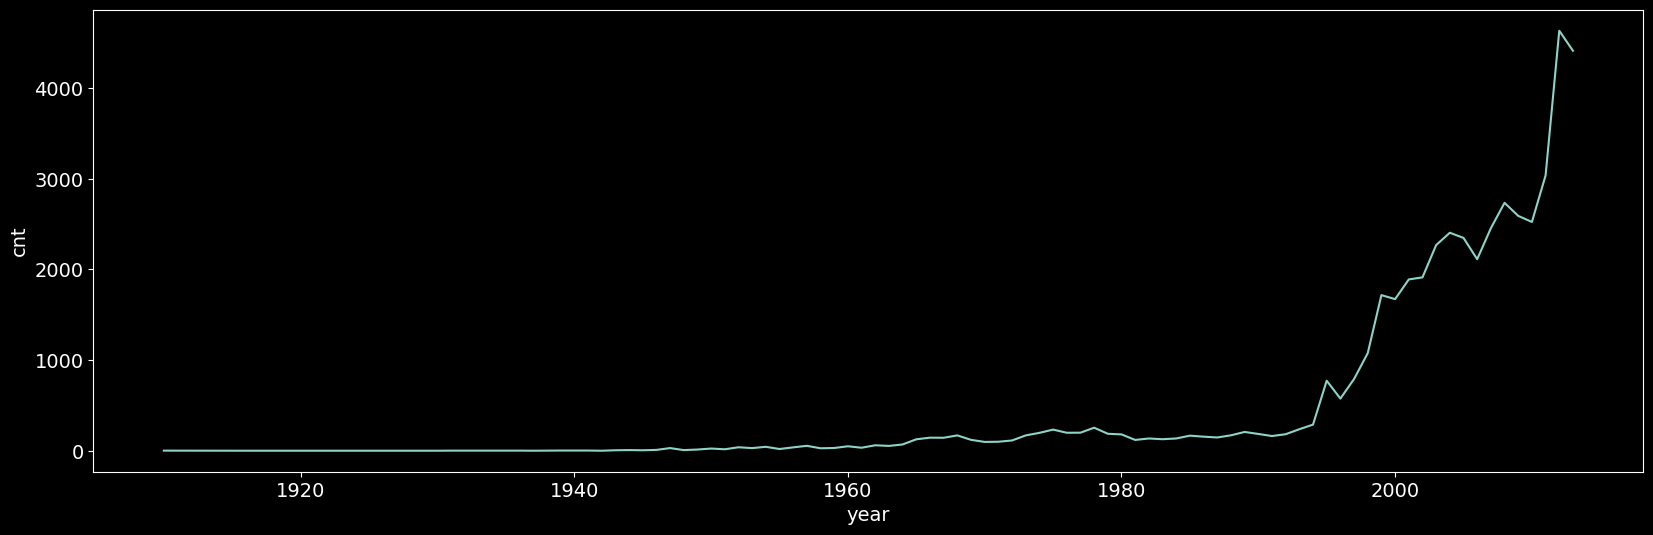

In [36]:
plt.figure(figsize=(20,6))
sns.lineplot(x="year", y="cnt", data=year_group)

xlabel


In [37]:
import plotly.express as px

fig = px.line(year_group, x=year_group.index, y=year_group.cnt, title='Visibility of UFOs')
fig.show()
fig.write_html("ufo_count_over_years.html")

In [38]:
# initialize dayofweek column with 0 as Monday.
filtered_ufo_df.loc[:, "weekday"] = filtered_ufo_df["datetime"].dt.day_name()

In [39]:
filtered_ufo_df.head(5)

datetime                  city state country     shape  \
0 1949-10-10 20:30:00            san marcos    tx      us  cylinder   
2 1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3 1956-10-10 21:00:00                  edna    tx      us    circle   
5 1961-10-10 19:00:00               bristol    tn      us    sphere   
6 1965-10-10 21:00:00    penarth (uk/wales)   NaN      gb    circle   

   visible_seconds visible_hrs_min  \
0           2700.0      45 minutes   
2             20.0      20 seconds   
3             20.0        1/2 hour   
5            300.0       5 minutes   
6            180.0    about 3 mins   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...  2004-04-27  29.883056   
2  Green/Orange circular disc over Chester&#44 En...  2008-01-21  53.200000   
3  My older brother and twin sister were leaving ...  2004-01-17  28.978333   
5  My father is now 89 my brother 52 the girl wit...  2007-04-27  36.595000   
6  penarth uk  circle  3mins  stayed 30ft above m...  2006-02-14  51.434722   

   longitude  month  year  day  hour  lognitude    weekday  
0 -97.941111     10  1949   10    20 -97.941111     Monday  
2  -2.916667     10  1955   10    17  -2.916667     Monday  
3 -96.645833     10  1956   10    21 -96.645833  Wednesday  
5 -82.188889     10  1961   10    19 -82.188889    Tuesday  
6  -3.180000     10  1965   10    21  -3.180000     Sunday

In [40]:
filtered_ufo_df['weekday'] = pd.Categorical(filtered_ufo_df['weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

weekday_group = (filtered_ufo_df[["weekday", "datetime"]]
.groupby("weekday", sort=False)
.count()
.rename(columns={"datetime":"cnt"})
)

print(weekday_group)

            cnt
weekday        
Monday     5972
Wednesday  6645
Tuesday    6624
Sunday     7186
Thursday   6679
Saturday   8699
Friday     7275


/tmp/ipykernel_167955/1262725821.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [41]:
fig = px.bar(weekday_group, x=weekday_group.index, y=weekday_group.cnt, labels={'x':'Weekday', 'cnt':'Count'}, title='Count of Sightings by Weekday')
plt.figure(figsize=(10,6))
fig.show()

<Figure size 1000x600 with 0 Axes>

In [42]:
month_group = (filtered_ufo_df[["month", "datetime"]]
.groupby("month")
.count()
.rename(columns={"datetime":"cnt"})
)


In [43]:
month_group

cnt
month      
1      3460
2      2777
3      3314
4      3374
5      3324
6      5275
7      5950
8      5230
9      4537
10     4410
11     4063
12     3366

/tmp/ipykernel_167955/2800270301.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'UFO observation peak months')

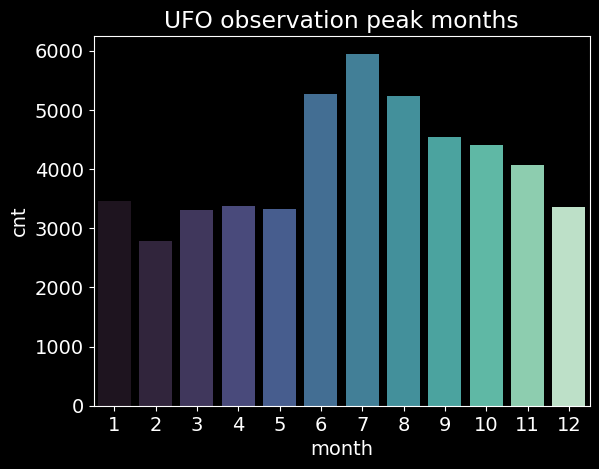

In [46]:
sns.barplot(x=month_group.index, y=month_group.cnt, data=month_group, palette="mako")
plt.title("UFO observation peak months")

In [47]:
hour_group = (filtered_ufo_df[["hour", "datetime"]]
.groupby("hour")
.count()
.rename(columns={"datetime":"cnt"})
)

In [48]:
print(hour_group)

       cnt
hour      
0     2826
1     1777
2     1307
3     1070
4      780
5      816
6      723
7      616
8      543
9      675
10     808
11     808
12    1025
13    1031
14    1062
15    1134
16    1204
17    1787
18    2584
19    3744
20    5142
21    6801
22    6260
23    4557


/tmp/ipykernel_167955/85222876.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'UFO observation peak hours')

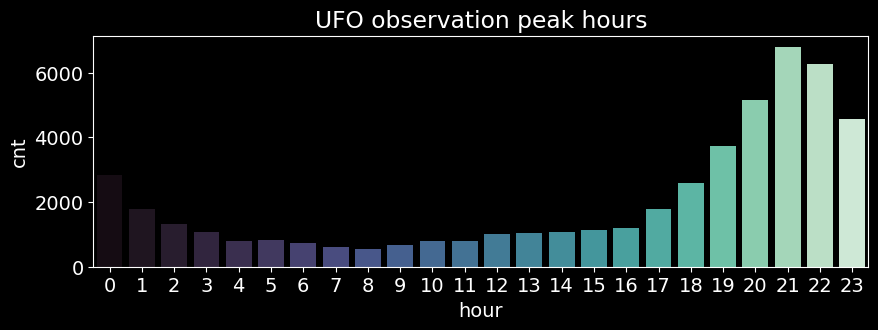

In [49]:
plt.figure(figsize=(10,3))
sns.barplot(x=hour_group.index, y=hour_group.cnt, data=hour_group, palette="mako")
plt.title("UFO observation peak hours")

In [50]:
filtered_ufo_df["shape"].unique()

array(['cylinder', 'circle', 'sphere', 'disk', 'fireball', 'oval',
       'other', 'rectangle', 'chevron', 'triangle', 'formation', 'cigar',
       nan, 'changing', 'flash', 'diamond', 'egg', 'teardrop', 'cone',
       'cross', 'pyramid', 'delta', 'crescent', 'round', 'hexagon'],
      dtype=object)

In [51]:
filtered_ufo_df["country"].unique()

array(['us', 'gb', nan, 'ca', 'au', 'de'], dtype=object)

In [52]:
country_group = (filtered_ufo_df[["country", "datetime"]]
.groupby("country")
.count()
.rename(columns={"datetime":"cnt"})
)


In [53]:
nan_count = filtered_ufo_df["country"].isna().sum()
print(nan_count)

6571


In [59]:
filt = (filtered_ufo_df["shape"].isin(["unknown", "light", "flare", "nan"]))
filtered_ufo_df = filtered_ufo_df[~filt]



In [60]:
filtered_ufo_df["shape"].unique()

array(['cylinder', 'circle', 'sphere', 'disk', 'fireball', 'oval',
       'other', 'rectangle', 'chevron', 'triangle', 'formation', 'cigar',
       nan, 'changing', 'flash', 'diamond', 'egg', 'teardrop', 'cone',
       'cross', 'pyramid', 'delta', 'crescent', 'round', 'hexagon'],
      dtype=object)

In [61]:
filtered_ufo_df.shape

(49080, 17)

In [64]:
import re

In [66]:
from typing import Counter
comments = filtered_ufo_df["comments"]
words = []
for comment in comments:
  if isinstance(comment, str):
    words.extend(re.findall(r'\b\w+\b', comment.lower()))
word_count = Counter(words)

print(word_count.most_common(50))


[('44', 27387), ('the', 21854), ('in', 20282), ('a', 19465), ('and', 15435), ('of', 12301), ('object', 10336), ('i', 10209), ('lights', 10026), ('to', 9643), ('sky', 9233), ('over', 8823), ('was', 8074), ('it', 6938), ('at', 6917), ('light', 6917), ('with', 6863), ('on', 6260), ('bright', 6171), ('orange', 6071), ('shaped', 5960), ('moving', 5045), ('red', 4762), ('my', 4510), ('white', 4439), ('from', 4358), ('craft', 4335), ('then', 4290), ('saw', 4274), ('ufo', 3707), ('seen', 3654), ('flying', 3554), ('very', 3464), ('like', 3372), ('that', 3134), ('large', 3019), ('no', 2880), ('objects', 2878), ('triangle', 2847), ('3', 2806), ('quot', 2789), ('two', 2678), ('shape', 2459), ('for', 2448), ('we', 2438), ('hovering', 2426), ('about', 2331), ('were', 2302), ('2', 2273), ('one', 2234)]


In [67]:
# string type define comments
# comments = filtered_ufo_df["comments"].apply(lambda x: str(x))


In [69]:
import nltk

nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/rorschach/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rorschach/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [72]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rorschach/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import pos_tag


filtered_ufo_df["comments"] = filtered_ufo_df["comments"].astype(str)

# Extract the 'comments' column
comments = filtered_ufo_df['comments']

# Tokenize the comments
words = word_tokenize(' '.join(comments))


# Remove punctuation and convert to lower case
words = [word.lower() for word in words if word.isalpha()]
custom_stop_words = ["i", "we", "a", "&", "the", "to", "as", "i", "we", "or", "ISS"]

# Remove stopwords
stop_words = set(stopwords.words('english') + custom_stop_words)
words = [word for word in words if word not in stop_words]


# Part-of-speech tagging
tagged = nltk.pos_tag(words)

# Filter out prepositions, verbs, etc.
filtered_words = [word for word, pos in tagged if pos not in ('IN', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ')]

# Count the frequency of each word
word_counts = Counter(filtered_words)



In [ ]:
# Display the most common words
print(word_counts.most_common(100))

[('lights', 11497), ('sky', 10174), ('object', 9929), ('light', 7401), ('bright', 5842), ('orange', 4996), ('white', 4837), ('craft', 4645), ('ufo', 4389), ('red', 4143), ('large', 3433), ('quot', 3185), ('two', 3040), ('objects', 2967), ('triangle', 2796), ('shape', 2734), ('night', 2649), ('one', 2603), ('triangular', 2352), ('formation', 2263), ('north', 2146), ('three', 1984), ('green', 1973), ('west', 1961), ('slowly', 1956), ('south', 1950), ('east', 1893), ('blue', 1879), ('fast', 1850), ('fireball', 1847), ('low', 1836), ('high', 1788), ('black', 1759), ('ball', 1682), ('speed', 1597), ('sphere', 1591), ('sound', 1501), ('round', 1499), ('nuforc', 1416), ('note', 1412), ('circular', 1405), ('star', 1370), ('strange', 1333), ('oval', 1300), ('silent', 1272), ('small', 1254), ('saw', 1229), ('minutes', 1198), ('pd', 1177), ('silver', 1164), ('slow', 1080), ('back', 1017), ('house', 990), ('area', 982), ('disk', 972), ('away', 956), ('huge', 953), ('aircraft', 952), ('cigar', 917)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

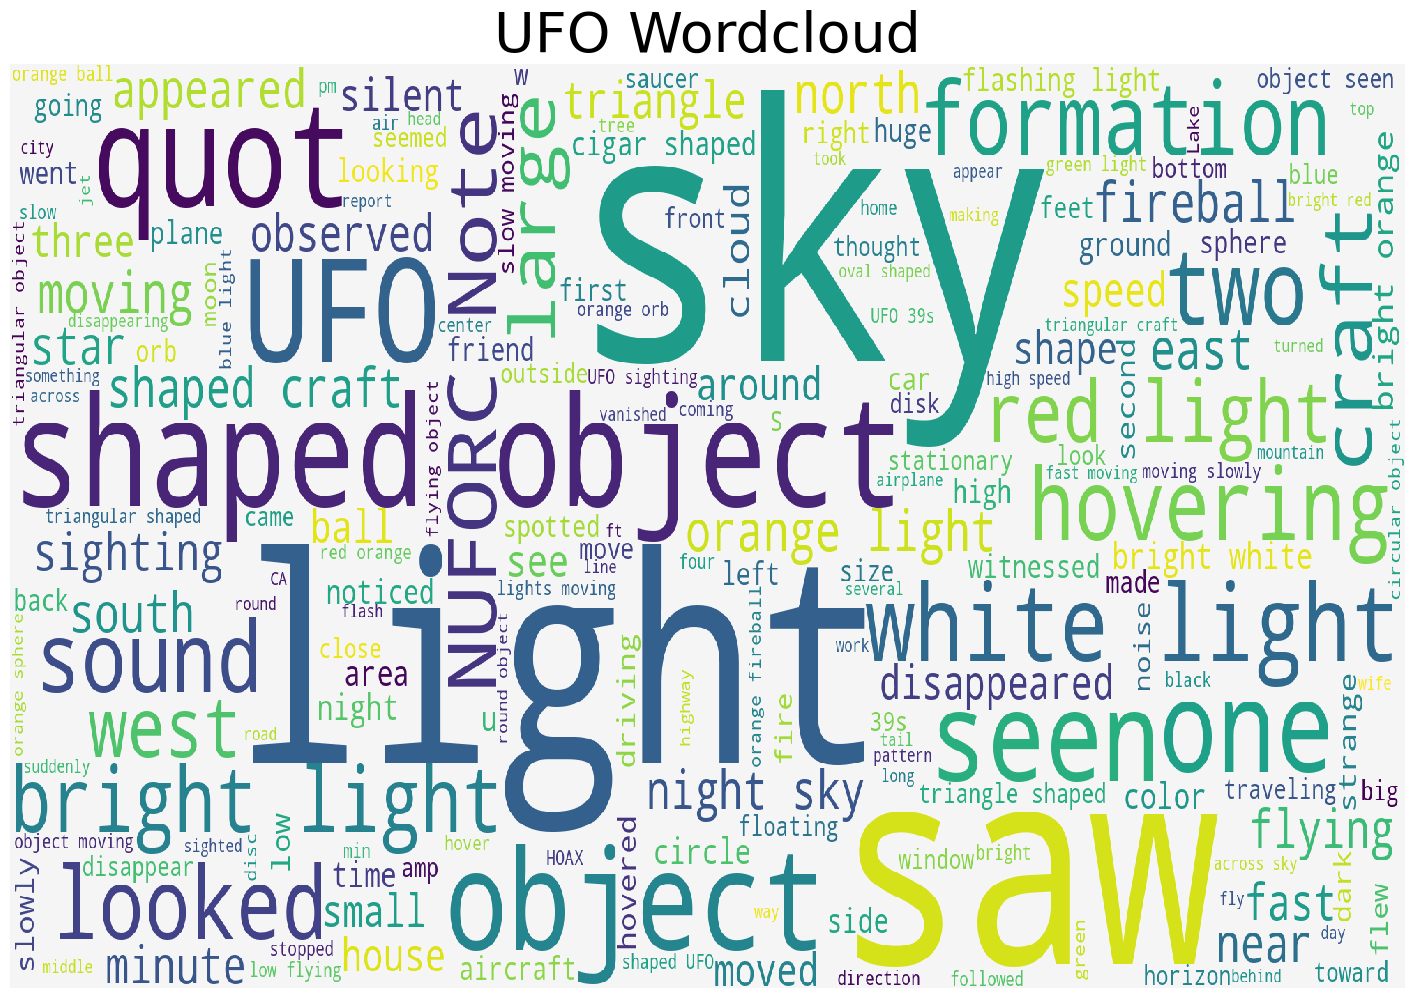

In [ ]:
cmt = [item for item in filtered_ufo_df.comments.dropna()]

cmt = " ".join(cmt)

plt.figure(figsize=(18,12))

wordcloud = WordCloud(background_color='whitesmoke', width=2000, height=1000,
                      stopwords=None).generate(cmt)
plt.imshow(wordcloud, interpolation="nearest", aspect='auto')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.title("UFO Wordcloud", size=40)

plt.show()

In [75]:

df = pd.read_csv("raw_data/military-bases.csv", sep=";")

df[["latitude", "longitude"]] = df["Geo Point"].str.split(",", expand=True)
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

print(df)

base_counts = df.groupby('State Terr').size()

# Create a DataFrame with the mean latitude and longitude for each state
df_mean = df.groupby('State Terr')[['latitude', 'longitude']].mean().reset_index()


df_merged = pd.merge(df_mean, base_counts.rename('count'), left_on='State Terr', right_index=True)
fig = px.scatter_geo(df_merged, lat='latitude', lon='longitude', color='count',
                     hover_name='State Terr', size='count',
                     projection='natural earth', title='Count of Army Bases in Different States')
fig.show()

                         Geo Point  \
0    31.2309993833, -85.6506347178   
1    31.8157331822, -85.6497984957   
2    33.1594636742, -106.425696182   
3    37.0130203962, -76.3043760544   
4    21.3866284869, -157.905641308   
..                             ...   
771  44.3965120263, -70.9365409929   
772  33.7730532491, -118.301027333   
773  32.9489566811, -115.750656601   
774  18.5094327133, -67.0991288097   
775  37.3063972082, -116.198549994   

                                             Geo Shape  OBJECTID_1  OBJECTID  \
0    {"coordinates": [[[-85.65462565497243, 31.2341...          26        65   
1    {"coordinates": [[[-85.65268851262239, 31.8128...          33        73   
2    {"coordinates": [[[-106.27973443186896, 33.910...          66       261   
3    {"coordinates": [[[[-76.29312038151345, 37.032...         114       899   
4    {"coordinates": [[[-157.8989279212737, 21.3927...         161      1237   
..                                                 ...         